In [26]:
import os
import sys

# Step 1: Set project root path (go up one level from notebooks/)
project_root = os.path.abspath(os.path.join(os.getcwd(),"..",".."))

# Step 2: Add project root to system path
if project_root not in sys.path:
    sys.path.append(project_root)

In [27]:
import sys
import os

# Add src folder to path
sys.path.append(os.path.abspath('../../src'))

In [28]:
import pandas as pd
df = pd.read_csv(r'C:\Users\ABC\Desktop\10Acadamy\week 4\-Amharic-E-commerce-Data-Extractor\data\raw\telegram_scraped_data.csv')

<Axes: ylabel='channel_username'>

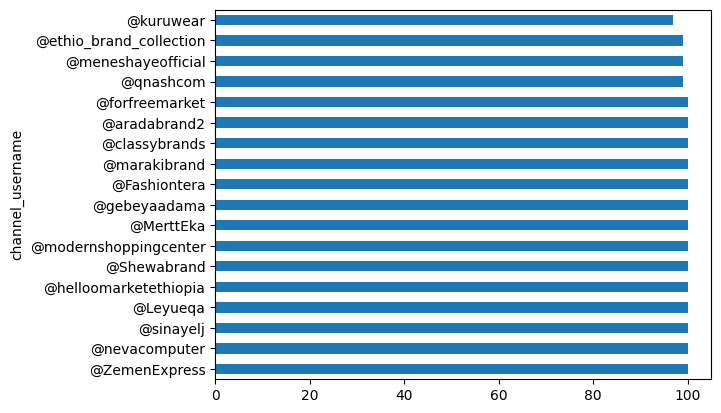

In [29]:
df['channel_username'].value_counts().plot(kind='barh')


# Amharic Text Preprocessing Script

## Purpose
This script is used to clean and normalize Amharic text data by:
- Removing unwanted symbols and emojis
- Normalizing whitespace
- Retaining essential Amharic characters and punctuation
- Lowercasing English text (optional)

This process is essential for preparing data for downstream NLP tasks such as Named Entity Recognition (NER).

---

## Code Usage

```python
from pre_processing import preprocess_amharic_text
df['text_cleaned'] = df['text'].apply(preprocess_amharic_text)


In [30]:
from pre_processing import preprocess_amharic_text
df['text_cleaned'] = df['text'].apply(preprocess_amharic_text)


In [31]:
df['text_length'] = df['text_cleaned'].str.len()
df = df.sort_values(by='text_length', ascending=False)


In [32]:
df.to_csv(r'C:\Users\ABC\Desktop\10Acadamy\week 4\-Amharic-E-commerce-Data-Extractor\data\processed\telegram_scraped_data_cleaned.csv', index=False)


# Preparing for coNLL Labeling

## Objective
The objective of this task is to create high-quality training data for Named Entity Recognition (NER) by manually labeling Amharic Telegram messages. These labels will help train a model that can extract key business entities relevant to the e-commerce domain in Ethiopia.

## Selection Criteria
To ensure a rich context for labeling:
- Messages are sorted by text length.
- The **top 30 longest messages** are selected **per Telegram channel**.
- Messages with empty or zero-length text are excluded.
- Only the text column is retained for annotation purposes.

## Export Format
Selected messages are saved as a `.csv` file and prepared for manual annotation. The format used for annotation is **CoNLL**, which is widely adopted for NER tasks.
 ready for CoNLL Format Guidelines




<Axes: >

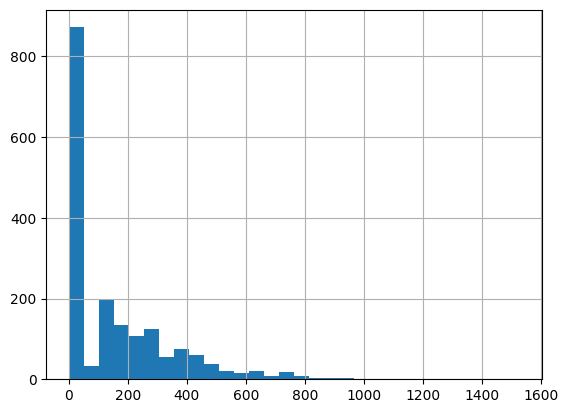

In [33]:
df['text_length'].hist(bins=30)


In [36]:
from collections import Counter
all_words = ' '.join(df['text']).split()
common = Counter(all_words).most_common(20)


In [34]:
# Group by channel and select top 10 longest messages
top_samples = df.sort_values(by='text_length', ascending=False).groupby('channel_username').head(30)
# Drop rows where text length == 0
df = df[df['text_length'] > 0]

# Keep only text column
df = df[['text']]
# Save selected samples to CSV for review or labeling
output_path = r"C:\Users\ABC\Desktop\10Acadamy\week 4\-Amharic-E-commerce-Data-Extractor\data\processed\top_30_messages_per_channel.csv"
top_samples[['channel_username', 'text', 'text_length']].to_csv(output_path, index=False)

output_path

'C:\\Users\\ABC\\Desktop\\10Acadamy\\week 4\\-Amharic-E-commerce-Data-Extractor\\data\\processed\\top_30_messages_per_channel.csv'